In [9]:
from stochastic_volatility_models.src.models.heston.heston import Heston
from notebook_utils import Notebook

In [15]:
# time = "2015-09-01"
time = "2013-07-11"
nb = Notebook(
	time=time,
	to_fit=False,
	model=Heston(
		# parameters={'initial_variance': 0.0895791230480412, 'long_term_variance': 0.02132400126278804, 'volatility_of_volatility': 2.969583797208843, 'mean_reversion_rate': 9.443457070939235, 'wiener_correlation': -0.9129100964090834},
		# parameters={"initial_variance": 0.0895791230480412, "long_term_variance": 0.0585764748315325, "volatility_of_volatility": 0.66658276362568, "mean_reversion_rate": 2.8425708029119816, "wiener_correlation": -0.987091552060316},
		parameters={"initial_variance": 0.01417449066157833, "long_term_variance": 0.0976082312303378, "volatility_of_volatility": 0.8599397768293384, "mean_reversion_rate": 0.24175166704773687, "wiener_correlation": -0.4525348016611488},
		# p		arameters={"initial_variance": 0.0895791230480412, "long_term_variance": 0.0585764748315325, "volatility_of_volatility": 0.66658276362568, "mean_reversion_rate": 2.8425708029119816, "wiener_correlation": -0.987091552060316},
		# {
		# 	"initial_variance": 0.10006713148885871,
		# 	"long_term_variance": 0.03159120037576484,
		# 	"volatility_of_volatility": 3.494923635327538,
		# 	"mean_reversion_rate": 6.106004979094863,
		# 	"wiener_correlation": -0.7977506888014699,
		# 	# "initial_variance": 0.011144267584207732,
		# 	# "long_term_variance": 0.34140469810684504,
		# 	# "volatility_of_volatility": 0.1042480258092263,
		# 	# "mean_reversion_rate": 1.682479418551077,
		# 	# "wiener_correlation": 0.7730677646334799,
		# 	# 'initial_variance': 0.08875668502752836,
		# 	# 'long_term_variance': 2.068818697150847,
		# 	# 'volatility_of_volatility': 1.9252372584313988,
		# 	# 'mean_reversion_rate': 0.1368647272232636,
		# 	# 'wiener_correlation': -0.31502691297922547,
		# 	# 'initial_variance': 0.2,
		# 	# 'long_term_variance': 0.05,
		# 	# 'volatility_of_volatility': 0.2,
		# 	# 'mean_reversion_rate': 5,
		# 	# 'wiener_correlation': 0,
		# 	# "initial_variance": 0.08413304906005692,
		# 	# "long_term_variance": 1.9610333314241082,
		# 	# "volatility_of_volatility": 1.7017854018991634,
		# 	# "mean_reversion_rate": 0.046344678235120895,
		# 	# "wiener_correlation": -0.3989517817128906,
		# },
	),
)
# nb.spx_price()

In [3]:
nbe = Notebook(
	time=time,
	model=None,
)

In [6]:
nb.underlying.price(nb.time)

1675.02

In [30]:
nb.volatility_underlying.price(nb.time)

14.01

In [44]:
import numpy as np

iv = (nb.volatility_underlying.price(nb.time) / 100) / np.sqrt(22)
(iv / 0.007499) - 1
# iv

2.9831204642513702

In [14]:
0.00677 / 0.005455

1.241063244729606

In [5]:
from stochastic_volatility_models.visualisations.volatility_surface import plot_volatility_surface_comparison, plot_volatility_surface_error_comparison

config = {
	"toImageButtonOptions": {
		"format": "svg",  # one of png, svg, jpeg, webp
		"filename": "custom_image",
		# 'height': 800,
		# 'width': 1000,
		"scale": 1,  # Multiply title/legend/axis/canvas sizes by this factor
	}
}

model = nb.plot_surfaces(volatility=False)
empirical = nbe.plot_surfaces(volatility=False)
plot_volatility_surface_comparison(model, empirical, 0.4).show(config=config)
plot_volatility_surface_error_comparison(model, empirical, 1).show(config=config)
model = nb.plot_surfaces(volatility=True, call=False, price=False)
empirical = nbe.plot_surfaces(volatility=True, call=False, price=False)
plot_volatility_surface_comparison(model, empirical, 0.4).show()
plot_volatility_surface_error_comparison(model, empirical, 1).show()

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/Project/modules/stochastic_volatility_models/stochastic_volatility_models/visualisations/volatility_surface.py:152: RuntimeWarning:

divide by zero encountered in divide



In [4]:
import plotly.graph_objects as go
import numpy as np

# model.opacity=0.5

for trace in model.data:
	if isinstance(trace, go.Surface):
		model_z = np.array(trace.z)
for trace in empirical.data:
	if isinstance(trace, go.Surface):
		empirical_z = np.array(trace.z)
		empirical_y = trace.y
		empirical_x = trace.x
# model.update_traces(opacity=0.5)
# empirical.update_traces(opacity=0.5)
# empirical.data.update(dict(opacity=0.5))

fig = go.Figure(data=model.data + empirical.data, layout=model.layout)
fig.show()
# model.show()

go.Figure(data=[go.Surface(x=empirical_x, y=empirical_y, z=100 * np.abs((empirical_z - model_z) / empirical_z))], layout=empirical.layout).show()

# nb.spx_price()

In [10]:
nb.joint_volatility_surface.options

C                    P
Strike Expiry                                              
2200   2022-03-04  SPXW 220304C2200000  SPXW 220304P2200000
       2022-03-09  SPXW 220309C2200000  SPXW 220309P2200000
       2022-03-11  SPXW 220311C2200000  SPXW 220311P2200000
       2022-03-18  SPXW 220318C2200000  SPXW 220318P2200000
       2022-03-23  SPXW 220323C2200000  SPXW 220323P2200000
...                                ...                  ...
5400   2022-06-17  SPXW 220617C5400000  SPXW 220617P5400000
       2022-06-30  SPXW 220630C5400000  SPXW 220630P5400000
       2022-07-15  SPXW 220715C5400000  SPXW 220715P5400000
       2022-07-29  SPXW 220729C5400000  SPXW 220729P5400000
       2022-08-31  SPXW 220831C5400000  SPXW 220831P5400000

[1660 rows x 2 columns]

In [7]:
model_v = nb.plot_surfaces(volatility=True)
empirical_v = nbe.plot_surfaces(volatility=True)
# model.opacity=0.5

for trace in model_v.data:
	if isinstance(trace, go.Surface):
		trace.opacity = 0.5
		trace.colorscale = "Viridis"
		model_z_v = np.array(trace.z)
for trace in empirical_v.data:
	if isinstance(trace, go.Surface):
		trace.opacity = 0.5
		trace.colorscale = "Viridis"
		empirical_z_v = np.array(trace.z)
		empirical_y_v = trace.y
		empirical_x_v = trace.x
# model.update_traces(opacity=0.5)
# empirical.update_traces(opacity=0.5)
# empirical.data.update(dict(opacity=0.5))

fig = go.Figure(data=model_v.data + empirical_v.data)
fig.show()
# model.show()

go.Figure(data=[go.Surface(x=empirical_x_v, y=empirical_y_v, z=100 * np.abs((empirical_z_v - model_z_v) / empirical_z_v))], layout=empirical_v.layout).show()

In [4]:
nb.plot_surfaces()

In [13]:
nb.plot_surfaces(volatility=True, call=False)

In [28]:
nb.plot_put_call_iv(plot_closeup=False, volatility=True)
nb.plot_joint_price(plot_closeup=True, volatility=True)
nb.plot_iv(plot_closeup=False, volatility=True)
nb.plot_price(plot_closeup=False, volatility=True)

In [29]:
nb.plot_put_call_iv(plot_closeup=False)
nb.plot_iv(plot_closeup=True)
nb.plot_iv(plot_closeup=False)
nb.plot_price(plot_closeup=False)

In [16]:
nb.plot_strike_iv()
nb.plot_strike_price()

In [30]:
nb.to_fit = True
WEIGHTS = dict(
	skew_weight=0.00,
	vol_weight=0.0,
)
parameters = nb.fit(**WEIGHTS)
print(parameters)

ValueError: Some entries in x0 lay outside the specified bounds

In [ ]:
print(nb.model.parameters)
nb.evaluate_fit(**WEIGHTS)

{'initial_variance': 0.08413304906005692, 'long_term_variance': 1.9610333314241082, 'volatility_of_volatility': 1.7017854018991634, 'mean_reversion_rate': 0.046344678235120895, 'wiener_correlation': -0.3989517817128906}


0.0480812971174829

vol 0.5, skew 0.01:

`{'initial_variance': 0.021144267584207732, 'long_term_variance': 0.34140469810684504, 'volatility_of_volatility': 0.5042480258092263, 'mean_reversion_rate': 4.682479418551077, 'wiener_correlation': 0.7730677646334799}`

```python
{
	'initial_variance': 0.10006713187966065,
	'long_term_variance': 0.03159120049914011,
	'volatility_of_volatility': 3.4949236489765254,
	'mean_reversion_rate': 6.106005002941104,
	'wiener_correlation': -0.7977506958223608,
}
```

`{'initial_variance': 0.10006832835112515, 'long_term_variance': 0.03159170137871641, 'volatility_of_volatility': 3.4949241481162274, 'mean_reversion_rate': 6.1060056971045755, 'wiener_correlation': -0.7977506589463015}`

`{'initial_variance': 0.10006713148885871, 'long_term_variance': 0.03159120037576484, 'volatility_of_volatility': 3.494923635327538, 'mean_reversion_rate': 6.106004979094863, 'wiener_correlation': -0.7977506888014699}`

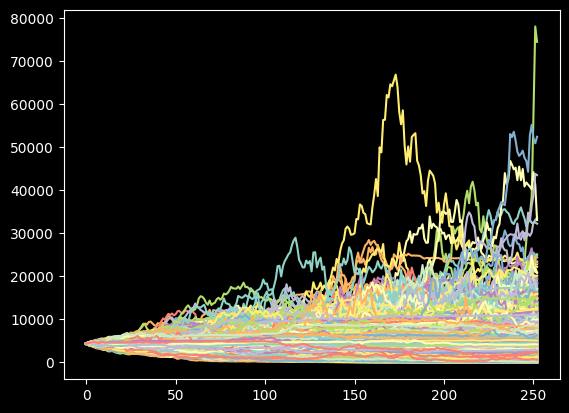

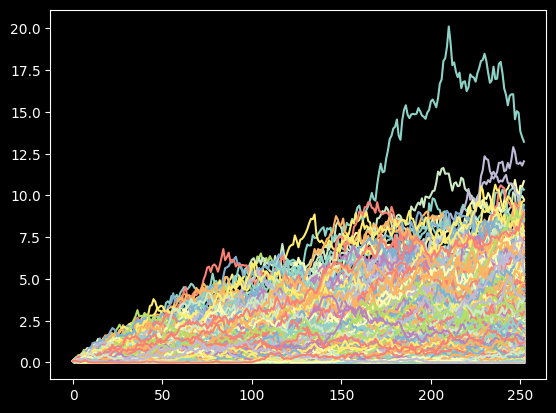

In [ ]:
nb.plot_paths(num_show=None)

In [ ]:
nb.plot_joint_price(plot_closeup=True)

In [ ]:
nb.plot_joint_price(plot_closeup=False, volatility=True)